In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

num_steps: 36
imageSize: (96, 96)
normalize: False


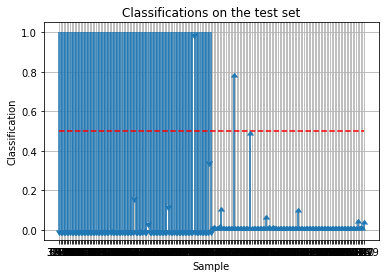

Accuracy for bestFaceEndToEnd_new.h5 is 0.5
MAE for bestFaceEndToEnd_new.h5 is 0.49948109089737464 with std 0.4935904750875362
Wrong classification for ['/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/3364.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/6919.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/37252.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/36736.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/35567.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/9317.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/30858.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/7274.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/40098.pickle', '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/positiveSamples/7009.pickle', '/home/alubi

In [9]:
###TEsting use of the testset ^^
from vvadlrs3.utils.kerasUtils import *
modelToTestSet = {
     "/home/alubitz/Downloads/bestFaceEndToEnd_new.h5": '/home/alubitz/SCRATCH/balancedCleandDataSet/testSet/',
#     "/home/alubitz/repos/VVAD/vvadlrs3/bestLipEndToEnd.h5": '/home/alubitz/SCRATCH/lipImageDataset/testSet/',
#     "/home/al/repos/lipmotiondetection/code/bestFaceEndToEnd.h5": '/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/balancedCleandDataSet/anotherTestSet/',
#     "/home/alubitz/repos/VVAD/vvadlrs3/lipFeatureModel.h5": '/home/alubitz/SCRATCH/lipFeaturesDataset/testSet/',
#    "/home/alubitz/repos/VVAD/vvadlrs3/faceFeatureModel.h5": '/home/alubitz/SCRATCH/faceFeaturesDataset/testSet/',
#     'bestFaceEndToEnd.h5':'../wrongLabels/FaceImages/',
#     'bestLipEndToEnd.h5':'../wrongLabels/LipImages/',
#    'lipFeatureModel.h5':'../wrongLabels/LipFeatures/',
#    'faceFeatureModel.h5':'../wrongLabels/FaceFeatures/',
    
}
for model, testSet in modelToTestSet.items():
    acc,(mae, maeStd), (mse, mseStd), errors = testModel(model, testSet, saveTo= model.split("/")[-1].split('.')[0] + '.png')
    print("Accuracy for {} is {}".format(model.split("/")[-1], acc))
    print("MAE for {} is {} with std {}".format(model.split("/")[-1], mae, maeStd))
    print('Wrong classification for {}'.format(errors))
   # print("MSE for {} is {} with std {}".format(model.split("/")[-1], mse, mseStd)) #maybe not so helpful because all errors are smaller than 0

In [16]:
import pickle 
with open('../humanAccuracyTest/names/fullNames.pickle', 'rb') as pFile:
    a = pickle.load(pFile)
print(a)

['negativeSamples/2212', 'negativeSamples/11077', 'negativeSamples/3027', 'negativeSamples/13044', 'negativeSamples/10908', 'negativeSamples/13913', 'negativeSamples/2387', 'negativeSamples/12673', 'negativeSamples/12324', 'negativeSamples/9867', 'negativeSamples/15617', 'negativeSamples/12358', 'negativeSamples/3980', 'negativeSamples/8861', 'negativeSamples/6116', 'negativeSamples/20524', 'negativeSamples/18042', 'negativeSamples/19294', 'negativeSamples/6579', 'negativeSamples/8795', 'negativeSamples/6472', 'negativeSamples/2424', 'negativeSamples/3486', 'negativeSamples/6140', 'negativeSamples/11114', 'negativeSamples/16729', 'negativeSamples/10290', 'negativeSamples/5344', 'negativeSamples/2746', 'negativeSamples/18881', 'negativeSamples/20751', 'negativeSamples/14432', 'negativeSamples/3956', 'negativeSamples/17845', 'negativeSamples/14863', 'negativeSamples/15725', 'negativeSamples/12539', 'negativeSamples/13757', 'negativeSamples/2775', 'negativeSamples/3467', 'negativeSamples/

In [20]:
import numpy as np
print(np.random.uniform(0, 0.1))

0.07752562620798727


In [31]:
###Testing Array normalization
import numpy as np
from sample import *
arr = [
    [[1,2], [2,4], [40,8]], 
    [[3,2], [4,3], [9,4]], 
    [[-1,-2], [-2,-4], [-4,-8]], 
    [[-3,-2], [-4,-3], [-19,-4]]
]
s = FeatureizedSample()
normalizedArr = s._normalize(arr)
print(normalizedArr)

[[[ 0.025  0.05 ]
  [ 0.05   0.1  ]
  [ 1.     0.2  ]]

 [[ 0.075  0.05 ]
  [ 0.1    0.075]
  [ 0.225  0.1  ]]

 [[-0.025 -0.05 ]
  [-0.05  -0.1  ]
  [-0.1   -0.2  ]]

 [[-0.075 -0.05 ]
  [-0.1   -0.075]
  [-0.475 -0.1  ]]]


In [12]:
###GRAP THE NAMES FROM HUMACCVIDEOS
import glob
import pickle
fullNames = []
videoSamples = glob.glob("../videoSamples/**/*.mp4")
for video in videoSamples:
    video = video.replace("../videoSamples/", '')
    video = video.replace(".mp4", '')
    fullNames.append(video)
print("len(fullNames): {}".format(len(fullNames)))
with open("../humanAccuracyTest/names/fullNames.pickle", 'wb') as pickleFile:
    pickle.dump(fullNames, pickleFile)
    
with open("../humanAccuracyTest/names/fullNames.pickle", 'rb') as readPickleFile:
    testFullNames = pickle.load(readPickleFile)
print(testFullNames)

len(fullNames): 200
['negativeSamples/2212', 'negativeSamples/11077', 'negativeSamples/3027', 'negativeSamples/13044', 'negativeSamples/10908', 'negativeSamples/13913', 'negativeSamples/2387', 'negativeSamples/12673', 'negativeSamples/12324', 'negativeSamples/9867', 'negativeSamples/15617', 'negativeSamples/12358', 'negativeSamples/3980', 'negativeSamples/8861', 'negativeSamples/6116', 'negativeSamples/20524', 'negativeSamples/18042', 'negativeSamples/19294', 'negativeSamples/6579', 'negativeSamples/8795', 'negativeSamples/6472', 'negativeSamples/2424', 'negativeSamples/3486', 'negativeSamples/6140', 'negativeSamples/11114', 'negativeSamples/16729', 'negativeSamples/10290', 'negativeSamples/5344', 'negativeSamples/2746', 'negativeSamples/18881', 'negativeSamples/20751', 'negativeSamples/14432', 'negativeSamples/3956', 'negativeSamples/17845', 'negativeSamples/14863', 'negativeSamples/15725', 'negativeSamples/12539', 'negativeSamples/13757', 'negativeSamples/2775', 'negativeSamples/3467

In [23]:
from dataSet import *
makeTestSet('/media/al/0fd62943-862a-40b9-a4db-fe92a880b732/lipImageDataset', '../humanAccuracyTest/names/fullNames.pickle')

NAME: negativeSamples/2212
NAME: negativeSamples/11077
NAME: negativeSamples/3027
NAME: negativeSamples/13044
NAME: negativeSamples/10908
NAME: negativeSamples/13913
NAME: negativeSamples/2387
NAME: negativeSamples/12673
NAME: negativeSamples/12324
NAME: negativeSamples/9867
NAME: negativeSamples/15617
NAME: negativeSamples/12358
NAME: negativeSamples/3980
NAME: negativeSamples/8861
NAME: negativeSamples/6116
NAME: negativeSamples/20524
NAME: negativeSamples/18042
NAME: negativeSamples/19294
NAME: negativeSamples/6579
NAME: negativeSamples/8795
NAME: negativeSamples/6472
NAME: negativeSamples/2424
NAME: negativeSamples/3486
NAME: negativeSamples/6140
NAME: negativeSamples/11114
NAME: negativeSamples/16729
NAME: negativeSamples/10290
NAME: negativeSamples/5344
NAME: negativeSamples/2746
NAME: negativeSamples/18881
NAME: negativeSamples/20751
NAME: negativeSamples/14432
NAME: negativeSamples/3956
NAME: negativeSamples/17845
NAME: negativeSamples/14863
NAME: negativeSamples/15725
NAME: ne

In [14]:
import numpy as np
data = [[[1,2],[3,4] ], [[11, 9], [8, 7]], [[4, 5], [2, 10]]]
data = np.array(data)
max_x, max_y = np.max(np.amax(data, axis=1), axis = 0)
#max_x = max(data, key=lambda: fra)

print(max_x)

11


## Check time for samples from BAK in memory against 50 samples with hdf5DataGen

In [2]:
batch_size = 4
epochs = 10
train_path = "../data/hdf5DataBAK/vvad_train.hdf5"
val_path = "../data/hdf5DataBAK/vvad_validation.hdf5"
num_steps=1
imageSize=(100, 100)
one_hot = True

### From Memory

In [3]:
from kerasUtils import *


(train_x, train_y), validation_data = hdf5SamplesToMemory(train_path, val_path, num_steps=num_steps, imageSize=imageSize, one_hot = one_hot)
input_shape = train_x[0].shape



model, modelName = Models.buildBaselineModel('mobileNet', input_shape=input_shape, weights=None, classes=2)

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)

Using TensorFlow backend.


The following GPU devices are available: /device:GPU:0
'hdf5SamplesToMemory'  112.54 ms
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 40 samples, validate on 10 samples
Epoch 1/10
40/40 [==============================] - 4s 92ms/step - loss: 1.6369 - acc: 0.6250 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
40/40 [==============================] - 0s 5ms/step - loss: 1.7189 - acc: 0.6250 - val_loss: 0.9618 - val_acc: 0.5000
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 0.9990 - acc: 0.6000 - val_loss: 5.8774 - val_acc: 0.5000
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 1.0024 - acc: 0.6250 - val_loss: 7.5397 - val_acc: 0.5000
Epoch 5/10
40/40 [================

### With HDF5Generator

In [5]:
from kerasUtils import *
t = hdf5DataGenerator(train_path, num_steps=num_steps, imageSize=imageSize, one_hot = one_hot, batch_size=batch_size)
v = hdf5DataGenerator(val_path, num_steps=num_steps, imageSize=imageSize, one_hot = one_hot, batch_size=batch_size)

input_shape = t[0][0].shape[1:]
print(input_shape)

model, modelName = Models.buildBaselineModel('mobileNet', input_shape=input_shape, weights=None, classes=2)

history = model.fit_generator(generator=t,
                    validation_data = v,
                    epochs=epochs,
                    use_multiprocessing=True,
                    workers=1,
                    max_queue_size=16)

(100, 100, 3)
Epoch 1/10
10/10 [==============================] - 4s 373ms/step - loss: 1.3749 - acc: 0.6250 - val_loss: 10.0738 - val_acc: 0.3750
Epoch 2/10
10/10 [==============================] - 0s 21ms/step - loss: 1.2932 - acc: 0.6000 - val_loss: 8.6042 - val_acc: 0.3750
Epoch 3/10
10/10 [==============================] - 0s 36ms/step - loss: 1.4305 - acc: 0.6000 - val_loss: 3.3675 - val_acc: 0.3750
Epoch 4/10
10/10 [==============================] - 0s 28ms/step - loss: 0.3354 - acc: 0.9000 - val_loss: 1.1406 - val_acc: 0.5000
Epoch 5/10
10/10 [==============================] - 0s 28ms/step - loss: 0.4620 - acc: 0.8000 - val_loss: 8.8573 - val_acc: 0.3750
Epoch 6/10
10/10 [==============================] - 0s 28ms/step - loss: 0.9872 - acc: 0.7250 - val_loss: 8.1822 - val_acc: 0.3750
Epoch 7/10
10/10 [==============================] - 0s 28ms/step - loss: 0.2831 - acc: 0.8250 - val_loss: 9.9479 - val_acc: 0.3750
Epoch 8/10
10/10 [==============================] - 0s 28ms/step - 

### With PickleGenerator

In [9]:
from kerasUtils import *
import numpy as np
validation_split = 0.2
path = '../data/balancedCleandDataSetBAK'
allPickles = glob.glob(path + '/**/*.pickle', recursive=True)

print(len(allPickles))
    
np.random.shuffle(allPickles)
validationPickles = allPickles[:int(len(allPickles) * validation_split)]
trainPickles = allPickles[int(len(allPickles) * validation_split):]




t = DataGenerator(trainPickles, num_steps=num_steps, imageSize=imageSize, one_hot = one_hot, batch_size=batch_size)
v = DataGenerator(validationPickles, num_steps=num_steps, imageSize=imageSize, one_hot = one_hot, batch_size=batch_size)

input_shape = t[0][0].shape[1:]
print(input_shape)

model, modelName = Models.buildBaselineModel('mobileNet', input_shape=input_shape, weights=None, classes=2)

history = model.fit_generator(generator=t,
                    validation_data = v,
                    epochs=epochs,
                    use_multiprocessing=True,
                    workers=2,
                    max_queue_size=16)

50
(100, 100, 3)
Epoch 1/10
10/10 [==============================] - 6s 622ms/step - loss: 1.4182 - acc: 0.4750 - val_loss: 2.6002 - val_acc: 0.2500
Epoch 2/10
10/10 [==============================] - 0s 26ms/step - loss: 1.3926 - acc: 0.6000 - val_loss: 1.5007 - val_acc: 0.7500
Epoch 3/10
10/10 [==============================] - 0s 47ms/step - loss: 1.1572 - acc: 0.7000 - val_loss: 1.6362 - val_acc: 0.3750
Epoch 4/10
10/10 [==============================] - 0s 32ms/step - loss: 0.6978 - acc: 0.6000 - val_loss: 3.3023 - val_acc: 0.7500
Epoch 5/10
10/10 [==============================] - 0s 47ms/step - loss: 1.1285 - acc: 0.5000 - val_loss: 0.6532 - val_acc: 0.7500
Epoch 6/10
10/10 [==============================] - 0s 30ms/step - loss: 0.7141 - acc: 0.7000 - val_loss: 1.6924 - val_acc: 0.6250
Epoch 7/10
10/10 [==============================] - 0s 46ms/step - loss: 0.5702 - acc: 0.8250 - val_loss: 3.8178 - val_acc: 0.7500
Epoch 8/10
10/10 [==============================] - 0s 29ms/step 

### Check hdf5DataGenerator

In [15]:
from kerasUtils import *
import h5py
hdf5_path = "../data/hdf5Data/vvad_datasetBAK.hdf5"

hdf5DataGen = hdf5DataGenerator(hdf5_path, batch_size = 4, imageSize = (100, 100), num_steps=4)
print('Num samples: {}'.format(hdf5DataGen.X.shape[0]))
batch = hdf5DataGen[1]
print('batch.shape: {}'.format(batch[0].shape))


The following GPU devices are available: /device:GPU:0
Num samples: 50
batch.shape: (4, 4, 100, 100, 3)


### Convert Dataset to HDF5

In [18]:
from dataSet import *
transformToHDF5('../data/balancedCleandDataSetBAK', '../data/hdf5DataBAK/', testing=True)

 Writing training data: 100.00%
 Writing validation data: 100.00%


### Setting up dataset

In [13]:
from kerasUtils import *
train, test = splitDataSet("/media/al/bcaed2d1-c378-44e2-a581-fae772b468db/data/balancedCleandDataSet", 0.15, 42)

In [14]:
from kerasUtils import *
import datetime
batch_size = 64
imageSize = (100, 100)
grayscale = False
num_steps = 4
one_hot = False
train_batches=20
valid_batches= 5



(train_x, train_y), validation_data = genData(train, 
                                              test,train_batches=train_batches, 
                                              valid_batches= valid_batches, 
                                              batch_size = batch_size, 
                                              imageSize = imageSize,
                                              grayscale = grayscale, 
                                              num_steps=num_steps, 
                                              one_hot=one_hot)


 Training data: 100.00%
 Validation data: 100.00%


In [ ]:
from kerasUtils import *
input_shape = train_x[0].shape
epochs = 20
batch_size = 64

model, modelName = Models.buildConvLSTM2D(input_shape=input_shape, num_layers=10, hidden_dense=True, hidden_dense_layers = 10)

history = model.fit(x=train_x, y=train_y, validation_data=validation_data, batch_size=batch_size, epochs=epochs)

Models.saveHistory(history.history, "{}_{}_{}_{}.pickle".format(modelName, batch_size, input_shape, datetime.datetime.now()))

[input_shape]: (4, 100, 100, 3)


# Save MNIST dataset on disk

In [1]:
from timeUtils import *
from keras.datasets import mnist
import pickle, os
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
folder = "../data/MNIST/"
epochs = 10

if not os.path.exists(folder):
    print("[INFO]: Creating {}".format(folder))
    os.makedirs(folder)
for i, sample in enumerate(zip(train_images, train_labels)):
    with open(folder+str(i)+".pickle", 'wb') as pFile:
        pickle.dump(sample, pFile)
    

Using TensorFlow backend.


In [2]:
# Reshaping the Data
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

from keras.utils import to_categorical
test_labels = to_categorical(test_labels)
train_labels = to_categorical(train_labels)


# Basic Model from Book

In [3]:
from keras import models, layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28*28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# DataGenerator

In [18]:
class SeqGen(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        #print("Fetching batch {}".format(idx))
        #time.sleep(0.5)

        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        return batch_x, batch_y

In [4]:
from keras.utils import Sequence, to_categorical
import numpy as np
import time
class BatchGen(Sequence):
    def __init__(self, data, batch_size = 32):
        self.data = data
        self.batch_size = batch_size

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        batch = self.data[index*self.batch_size:(index+1)*self.batch_size]
        # Generate data
        X = np.empty((self.batch_size, 28*28))
        y = np.empty((self.batch_size), dtype=np.uint8)
        
        for i, path in enumerate(batch):            
            # Store sample
            with open(path, 'rb') as file:
                sample = pickle.load(file)
                x = sample[0].reshape(28*28)
                x = x.astype('float32') / 255
                X[i,] = x

                # Store class
                y[i] = sample[1]
        
        
        return X, to_categorical(y, num_classes=10)


# train model with differnt numbers of workers

In [5]:
from timeUtils import timeit
import glob
@timeit
def trainModel(workers, epochs=10):
    mnist = glob.glob(folder + "/*.pickle")
    val = mnist[:1000]
    train = mnist[1000:]
    valGen = BatchGen(val)
    trainGen = BatchGen(train, batch_size = 128)
    history = network.fit_generator(generator=trainGen,
                    validation_data = valGen,#(test_images, test_labels),
                    use_multiprocessing = True,
                    epochs=epochs,
                    workers=workers)
    return history

# Run experiments

In [7]:
trainModel(1, epochs=epochs)

Epoch 1/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0079 - acc: 0.9978 - val_loss: 0.0108 - val_acc: 0.9960
Epoch 2/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0060 - acc: 0.9983 - val_loss: 0.0151 - val_acc: 0.9940
Epoch 3/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0047 - acc: 0.9986 - val_loss: 0.0187 - val_acc: 0.9929
Epoch 4/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0037 - acc: 0.9991 - val_loss: 0.0226 - val_acc: 0.9929
Epoch 5/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0261 - val_acc: 0.9929
Epoch 6/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0024 - acc: 0.9994 - val_loss: 0.0182 - val_acc: 0.9919
Epoch 7/10
460/460 [==============================] - 2s 4ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0279 - val_acc: 0.9929
Epoch 8/10
460/460 [==============================] - 2s 4ms/step - loss: 0.

In [8]:
trainModel(2, epochs=epochs)

Epoch 1/10
460/460 [==============================] - 1s 2ms/step - loss: 9.1823e-04 - acc: 0.9997 - val_loss: 0.0257 - val_acc: 0.9929
Epoch 2/10
460/460 [==============================] - 1s 3ms/step - loss: 7.9327e-04 - acc: 0.9998 - val_loss: 0.0287 - val_acc: 0.9909
Epoch 3/10
460/460 [==============================] - 1s 2ms/step - loss: 4.8199e-04 - acc: 0.9999 - val_loss: 0.0340 - val_acc: 0.9940
Epoch 4/10
460/460 [==============================] - 1s 2ms/step - loss: 5.8528e-04 - acc: 0.9998 - val_loss: 0.0266 - val_acc: 0.9909
Epoch 5/10
460/460 [==============================] - 1s 2ms/step - loss: 3.1406e-04 - acc: 0.9999 - val_loss: 0.0333 - val_acc: 0.9899
Epoch 6/10
460/460 [==============================] - 1s 3ms/step - loss: 2.8945e-04 - acc: 0.9999 - val_loss: 0.0351 - val_acc: 0.9919
Epoch 7/10
460/460 [==============================] - 1s 3ms/step - loss: 2.1779e-04 - acc: 0.9999 - val_loss: 0.0442 - val_acc: 0.9929
Epoch 8/10
460/460 [============================

In [9]:
trainModel(4, epochs=epochs)

Epoch 1/10
460/460 [==============================] - 1s 2ms/step - loss: 7.9373e-05 - acc: 1.0000 - val_loss: 0.0522 - val_acc: 0.9909
Epoch 2/10
460/460 [==============================] - 1s 2ms/step - loss: 8.7477e-05 - acc: 1.0000 - val_loss: 0.0569 - val_acc: 0.9869
Epoch 3/10
460/460 [==============================] - 1s 2ms/step - loss: 1.2889e-04 - acc: 0.9999 - val_loss: 0.0635 - val_acc: 0.9859
Epoch 4/10
460/460 [==============================] - 1s 2ms/step - loss: 6.5961e-05 - acc: 1.0000 - val_loss: 0.0517 - val_acc: 0.9889
Epoch 5/10
460/460 [==============================] - 1s 2ms/step - loss: 4.5285e-05 - acc: 1.0000 - val_loss: 0.0579 - val_acc: 0.9899
Epoch 6/10
460/460 [==============================] - 1s 2ms/step - loss: 1.1495e-04 - acc: 1.0000 - val_loss: 0.0623 - val_acc: 0.9839
Epoch 7/10
460/460 [==============================] - 1s 2ms/step - loss: 1.3616e-05 - acc: 1.0000 - val_loss: 0.0726 - val_acc: 0.9889
Epoch 8/10
460/460 [============================

In [10]:
trainModel(8, epochs=epochs)

Epoch 1/10
460/460 [==============================] - 1s 2ms/step - loss: 7.5379e-06 - acc: 1.0000 - val_loss: 0.0774 - val_acc: 0.9899
Epoch 2/10
460/460 [==============================] - 1s 3ms/step - loss: 8.6700e-06 - acc: 1.0000 - val_loss: 0.0769 - val_acc: 0.9859
Epoch 3/10
460/460 [==============================] - 1s 3ms/step - loss: 1.2706e-06 - acc: 1.0000 - val_loss: 0.0638 - val_acc: 0.9899
Epoch 4/10
460/460 [==============================] - 1s 3ms/step - loss: 1.6477e-07 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9909
Epoch 5/10
460/460 [==============================] - 1s 3ms/step - loss: 1.4927e-07 - acc: 1.0000 - val_loss: 0.0671 - val_acc: 0.9879
Epoch 6/10
460/460 [==============================] - 1s 3ms/step - loss: 1.3909e-07 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9879
Epoch 7/10
460/460 [==============================] - 1s 3ms/step - loss: 1.3481e-07 - acc: 1.0000 - val_loss: 0.0670 - val_acc: 0.9889
Epoch 8/10
460/460 [============================

In [6]:
network.fit(x=train_images, y=train_labels, validation_data=(test_images, test_labels), batch_size=128, epochs=epochs)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.2540 - acc: 0.9256 - val_loss: 0.1390 - val_acc: 0.9545
Epoch 2/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.1030 - acc: 0.9687 - val_loss: 0.1255 - val_acc: 0.9579
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.0683 - acc: 0.9790 - val_loss: 0.0741 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.0501 - acc: 0.9852 - val_loss: 0.0755 - val_acc: 0.9785
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.0379 - acc: 0.9885 - val_loss: 0.0746 - val_acc: 0.9773
Epoch 6/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.0287 - acc: 0.9912 - val_loss: 0.0688 - val_acc: 0.9802
Epoch 7/10
60000/60000 [==============================] - 1s 12us/step - loss: 0

# Plot errorbar test

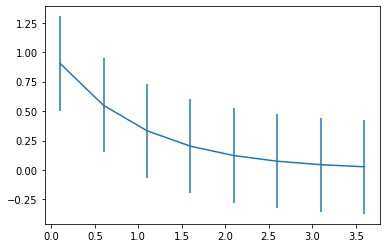

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
e = np.exp(x)

fig, ax = plt.subplots()
ax.errorbar(x, y, e)
plt.show()